# Project 6

### Introduction <br>
One of the most challenging step of the assigment is to find a suitable dataset to work on. This is hard because we are blindly searching for what dataset would fit in terms of size. An after, finding a good prospect, then is kind of hard to understand what mean the dataset as a whole and for each of its separate elements, columns, combined columns; all this to understan what **business need** we are trying to answer. <br>
###  This project will work to solve a business need: To optimize the customer complaint resolution.
• Business Goal: Reduce the resolution time for customer complaints to improve customer satisfaction and retention.<br>
• KPIs:<br>
    ○ Average resolution time per complaint.<br>
    ○ Percentage of complaints resolved within a certain timeframe (e.g., 3 days, 7 days).<br>
• Prepare dataset for the Machine Learning Model Prediction:<br>
    ○ Build a predictive model to forecast the resolution time for new complaints based on historical data such as product, issue type, and company response.<br>

In [3]:
import numpy as np
import pandas as pd
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#import geopandas as gpd
#from shapely.geometry import Point
import tempfile
import os  #to get local path to datasets wrangled
from sklearn.model_selection import train_test_split

In [14]:
#import zipfile
# Specify the path to the ZIP file
#complain_zip = "/content/complaints.zip"
# Extract the ZIP file
#with zipfile.ZipFile(complain_zip, 'r') as zip_ref:
#    zip_ref.extractall("/content/")
# Read the CSV file from the extracted directory
#csv_file_path = "/content/complaints.csv"
#df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
#df.head(5)


In [49]:
print(os.path.abspath("complaints.csv"))

C:\Users\emman\Downloads\complaints.csv


In [50]:
# Save the DataFrame to a pickle file
file_path = r"C:\Users\emman\Downloads\complaints.csv"
# Load the DataFrame from the pickle file
df = pd.read_csv(file_path)
# Display the first few rows of the DataFrame loaded from the pickle file
df.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-08-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,NJ,07024,NaN,Other,Web,2023-08-24,In progress,Yes,NaN,7452639
1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"SANTANDER HOLDINGS USA, INC.",FL,33972,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7512160
2,2023-07-13,Checking or savings account,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,Citibank allowed debit card transactions to ov...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,XXXXX,NaN,Consent provided,Web,2023-07-13,Closed with explanation,Yes,NaN,7244354
3,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",FL,33884,Servicemember,NaN,Web,2023-08-25,Closed with non-monetary relief,Yes,NaN,7453721
4,2023-09-13,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"SANTANDER HOLDINGS USA, INC.",TX,77521,NaN,NaN,Web,2023-09-13,Closed with explanation,Yes,NaN,7542838


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4091495 entries, 0 to 4091494
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 561.

In [52]:
df.nunique()

Date received                      4311
Product                              21
Sub-product                          85
Issue                               176
Sub-issue                           267
Consumer complaint narrative    1254191
Company public response              11
Company                            6953
State                                63
ZIP code                          33091
Tags                                  3
Consumer consent provided?            4
Submitted via                         7
Date sent to company               4260
Company response to consumer          8
Timely response?                      2
Consumer disputed?                    2
Complaint ID                    4091495
dtype: int64

In [19]:
nan_counts = df.isna().sum()
nan_counts

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        716727
Consumer complaint narrative    2608933
Company public response         2196051
Company                               0
State                             43234
ZIP code                          30213
Tags                            3664664
Consumer consent provided?       901658
Submitted via                         0
Date sent to company                  0
Company response to consumer          5
Timely response?                      0
Consumer disputed?              3323137
Complaint ID                          0
dtype: int64

In [53]:
# Check the data types of each column in the DataFrame
data_types = df.dtypes
# Print the data types
print(data_types)

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object


## Insights
**Customer Complaint Resolution Optimization:** <br>
In this goal, the focus is primarily on predicting resolution time based on various factors such as complaint type, product, company response, etc.<br>
While missing values in certain columns (e.g., consumer complaint narrative, company public response) may limit the amount of information available for analysis, the resolution time could still be predicted based on other features that are less likely to have missing values (e.g., product, issue).<br>
Features such as product type, issue category, and company response to consumer might not be significantly impacted by missing values, allowing for meaningful analysis and prediction of resolution time.<br>
Additionally, techniques such as imputation or using appropriate default values for missing data could be employed to handle NaN or NaT values in the dataset, ensuring that the analysis remains robust.<br>

In [56]:
# Display the first few rows of the optimized DataFrame
# Remove any duplicate rows: Check for and remove duplicate rows from the dataset to prevent over-representation of certain observations.
# Print the number of rows and columns before treatment
print("Before removing 'Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?':")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# List of columns to drop
columns_to_drop = ['Consumer complaint narrative',
                   'Company public response',
                   'Tags',
                   'Consumer consent provided?']

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Print the number of rows and columns after treatment
print("\nAfter removing 'Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?':")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])




Before removing 'Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?':
Number of rows: 4091495
Number of columns: 18

After removing 'Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?':
Number of rows: 4091495
Number of columns: 14


**First subproduct df**

In [68]:
# Save the optimized DataFrame to a csv file
df.to_csv("df1_ccro.csv")

In [69]:
print(os.path.abspath("df1_ccro.csv"))


C:\Users\emman\Downloads\df1_ccro.csv


In [70]:
# Save the DataFrame to a pickle file
file_path = r"C:\Users\emman\Downloads\df1_ccro.csv"
# Load the DataFrame from the pickle file
df1 = pd.read_csv(file_path)
# Display the first few rows of the DataFrame loaded from the pickle file
df1.head(5)

,Unnamed: 0,Date received,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,0,2023-08-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,Experian Information Solutions Inc.,NJ,07024,Web,2023-08-24,In progress,Yes,NaN,7452639
1,1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"SANTANDER HOLDINGS USA, INC.",FL,33972,Web,2023-08-25,Closed with explanation,Yes,NaN,7512160
2,2,2023-07-13,Checking or savings account,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,"CITIBANK, N.A.",TX,XXXXX,Web,2023-07-13,Closed with explanation,Yes,NaN,7244354
3,3,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"EQUIFAX, INC.",FL,33884,Web,2023-08-25,Closed with non-monetary relief,Yes,NaN,7453721
4,4,2023-09-13,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,"SANTANDER HOLDINGS USA, INC.",TX,77521,Web,2023-09-13,Closed with explanation,Yes,NaN,7542838


In [74]:
 # Remove any duplicate rows: Check for and remove duplicate rows from the dataset to prevent over-representation of certain observations.
 # Print the number of rows and columns before treatment
print("Before removing duplicates:")
print("Number of rows:", df1.shape[0])
print("Number of columns:", df1.shape[1])

# Remove duplicate rows
df1.drop_duplicates(inplace=True)

# Print the number of rows and columns after treatment
print("\nAfter removing duplicates:")
print("Number of rows:", df1.shape[0])
print("Number of columns:", df1.shape[1])


Before removing duplicates:
Number of rows: 4091495
Number of columns: 15

After removing duplicates:
Number of rows: 4091495
Number of columns: 15


In [75]:
# Count NaN values by column
nan_counts = df1.isna().sum()

# Display the counts
print(nan_counts)

Unnamed: 0                            0
Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        716727
Company                               0
State                             43234
ZIP code                          30213
Submitted via                         0
Date sent to company                  0
Company response to consumer          5
Timely response?                      0
Consumer disputed?              3323137
Complaint ID                          0
dtype: int64


### Populating 'State' from not NaN ' ZIP code' 
This to rescue relevant data that migh be deleted in the Nan values cleaning.

In [76]:
# Print the number of rows and columns before treatment
print("Before removing NaN in 'State' and 'ZIP code':")
print("Number of rows:", df1.shape[0])
print("Number of columns:", df1.shape[1])

# Drop rows with missing values in either 'State' or 'ZIP code' columns
df1_zip_state_notna = df1.dropna(subset=['State', 'ZIP code'])

# Print the number of rows and columns after treatment
print("\nAfter removing NaN in 'State' and 'ZIP code':")
print("Number of rows:", df1.shape[0])
print("Number of columns:", df1.shape[1])
# Create a dictionary mapping ZIP codes to states
#zip_to_state = dict(zip(df1_cleaned['ZIP code'], df1_cleaned['State']))

# Display the mapping
#print(zip_to_state)


Before removing NaN in 'State' and 'ZIP code':
Number of rows: 4091495
Number of columns: 15

After removing NaN in 'State' and 'ZIP code':
Number of rows: 4091495
Number of columns: 15


In [63]:
# Create a dictionary mapping ZIP codes to states
df1_zip_state_notna = dict(zip(df1_cleaned['ZIP code'], df1_cleaned['State']))

# Display the mapping
#print(df1_zip_state_notna)

In [77]:
# Count non-null values in 'State' before filling
non_null_before = df1['State'].notnull().sum()

In [78]:
# Define a function to fill missing 'State' values based on 'ZIP code'
def fill_state(row):
    if pd.isna(row['State']) and not pd.isna(row['ZIP code']):
        return df1_zip_state_notna.get(row['ZIP code'], row['State'])
    else:
        return row['State']

# Apply the function to fill missing 'State' values
df1['State'] = df1.apply(fill_state, axis=1)


In [79]:
# Count non-null values in 'State' after filling
non_null_after = df1['State'].notnull().sum()

# Print the difference in non-null values
print("Number of values populated:", non_null_after - non_null_before)

Number of values populated: 0


### Removing NaNs and additional columns from df1

In [67]:
# Calculate NaN proportions for each column
nan_proportions = df1.isna().mean()

# Define thresholds for categorization
thresholds = {
    'ZeroNaN': 0,
    'Less than 15% NaN': 0.15,
    'Less than 20% NaN': 0.20,
}

# Initialize dictionaries to store columns in each category
categories = {key: [] for key in thresholds.keys()}
categories['More than 20%'] = []  # Add the missing key

# Categorize columns based on NaN proportions
for column, proportion in nan_proportions.items():
    if proportion == 0:
        categories['ZeroNaN'].append(column)
    elif proportion < 0.15:
        categories['Less than 15% NaN'].append(column)
    elif proportion < 0.20:
        categories['Less than 20% NaN'].append(column)
    else:
        categories['More than 20%'].append(column)

# Print columns in each category
for category, columns in categories.items():
    print(f"Columns in '{category}':")
    print(columns)
    print()



Columns in 'ZeroNaN':
['Unnamed: 0', 'Date received', 'Product', 'Issue', 'Company', 'Submitted via', 'Date sent to company', 'Timely response?', 'Complaint ID']

Columns in 'Less than 15% NaN':
['Sub-product', 'State', 'ZIP code', 'Company response to consumer']

Columns in 'Less than 20% NaN':
[]

Columns in 'More than 20%':
['Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?']



In [82]:
# List of columns to get unique values for
columns_to_check = ['Sub-product', 'Company response to consumer', 'Sub-issue', 'Consumer disputed?']

# Get unique values for each column
unique_values = {col: df1[col].unique() for col in columns_to_check}

# Print unique values for each column
for col, values in unique_values.items():
    print(f"Unique values for '{col}':")
    print(values)
    print()


Unique values for 'Sub-product':
['Credit reporting' 'Checking account' 'Store credit card'
 'General-purpose credit card or charge card' 'Credit card debt'
 'Domestic (US) money transfer' 'Auto debt' 'Savings account'
 'Other personal consumer report' 'Federal student loan servicing'
 'Medical debt' 'Telecommunications debt' 'FHA mortgage' 'Lease'
 'Personal line of credit' 'Virtual currency' 'Conventional home mortgage'
 'I do not know' 'Loan' 'Payday loan'
 'Home equity loan or line of credit (HELOC)' 'Private student loan'
 'Other banking product or service' 'Mobile or digital wallet'
 'Government benefit card' 'VA mortgage' 'Rental debt'
 'CD (Certificate of Deposit)' 'Other debt' 'Payday loan debt'
 'International money transfer' 'General-purpose prepaid card'
 'Credit repair services' 'Private student loan debt'
 "Money order, traveler's check or cashier's check" 'Installment loan'
 'Title loan' 'Debt settlement' 'Gift card' 'Reverse mortgage'
 'Foreign currency exchange' 'Other

In [85]:
# Display the first few rows of the optimized DataFrame
# Remove any duplicate rows: Check for and remove duplicate rows from the dataset to prevent over-representation of certain observations.
# Print the number of rows and columns before treatment
print("Before removing 'Consumer disputed' and 'Sub-issue':")
print("Number of rows:", df1.shape[0])
print("Number of columns:", df1.shape[1])

# List of columns to drop
columns_to_drop = ['Consumer disputed?', 'Sub-issue']

# Drop the columns
df1 = df.drop(columns=columns_to_drop)

# Print the number of rows and columns after treatment
print("\nAfter removing 'Consumer disputed' and 'Sub-issue':")
print("Number of rows:", df1.shape[0])
print("Number of columns:", df1.shape[1])


Before removing 'Consumer disputed' and 'Sub-issue':
Number of rows: 4091495
Number of columns: 15

After removing 'Consumer disputed' and 'Sub-issue':
Number of rows: 4091495
Number of columns: 12


In [86]:
 # Remove any duplicate rows: Check for and remove duplicate rows from the dataset to prevent over-representation of certain observations.
 # Print the number of rows and columns before treatment
print("Before removing duplicates:")
print("Number of rows:", df1.shape[0])
print("Number of columns:", df1.shape[1])

# Remove duplicate rows
df1.drop_duplicates(inplace=True)

# Print the number of rows and columns after treatment
print("\nAfter removing duplicates:")
print("Number of rows:", df1.shape[0])
print("Number of columns:", df1.shape[1])

Before removing duplicates:
Number of rows: 4091495
Number of columns: 12

After removing duplicates:
Number of rows: 4091495
Number of columns: 12


#### Dropping additional  columns with high NaN concentration;
Here I am talking about 'Consumer disputed?'Also this does not add data about the business case. I will not relevant to predict resolution time.

In [87]:
 # Remove any duplicate rows: Check for and remove duplicate rows from the dataset to prevent over-representation of certain observations.
 # Print the number of rows and columns before treatment
print("Before removing NaNs:")
print("Number of rows:", df1.shape[0])
print("Number of columns:", df1.shape[1])

# Remove duplicate rows
df1_cleaned = df1.dropna()
df11 = df1_cleaned

# Print the number of rows and columns after treatment
print("\nAfter removing NaNs:")
print("Number of rows:", df11.shape[0])
print("Number of columns:", df11.shape[1])


Before removing NaNs:
Number of rows: 4091495
Number of columns: 12

After removing NaNs:
Number of rows: 3813956
Number of columns: 12


In [88]:
df11.to_csv("ccro_no_nan.csv")
print(os.path.abspath("ccro_no_nan.csv"))


C:\Users\emman\Downloads\ccro_no_nan.csv


In [10]:
# Save the DataFrame to a pickle file
file_path = r"C:\Users\emman\Downloads\ccro_no_nan.csv"
# Load the DataFrame from the pickle file
df2 = pd.read_csv(file_path)
# Display the first few rows of the DataFrame loaded from the pickle file
df2.head(5)

,Unnamed: 0,Date received,Product,Sub-product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,0,2023-08-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Experian Information Solutions Inc.,NJ,07024,Web,2023-08-24,In progress,Yes,7452639
1,1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,"SANTANDER HOLDINGS USA, INC.",FL,33972,Web,2023-08-25,Closed with explanation,Yes,7512160
2,2,2023-07-13,Checking or savings account,Checking account,Problem caused by your funds being low,"CITIBANK, N.A.",TX,XXXXX,Web,2023-07-13,Closed with explanation,Yes,7244354
3,3,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,"EQUIFAX, INC.",FL,33884,Web,2023-08-25,Closed with non-monetary relief,Yes,7453721
4,4,2023-09-13,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,"SANTANDER HOLDINGS USA, INC.",TX,77521,Web,2023-09-13,Closed with explanation,Yes,7542838


In [11]:
# Reorder columns to move "Complaint ID" to the beginning
df2 = df2[['Complaint ID'] + [col for col in df2.columns if col != 'Complaint ID']]

In [12]:
# Drop unnamed columns
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]

In [13]:
# Rename the 'Sub-product' column to 'SubProduct'
df2 = df2.rename(columns={'Sub-product': 'SubProduct'})

# Print the first few rows of the DataFrame to verify the column names
print(df2.head())


   Complaint ID Date received  \
0       7452639    2023-08-24   
1       7512160    2023-08-25   
2       7244354    2023-07-13   
3       7453721    2023-08-25   
4       7542838    2023-09-13   

                                             Product        SubProduct  \
0  Credit reporting, credit repair services, or o...  Credit reporting   
1  Credit reporting or other personal consumer re...  Credit reporting   
2                        Checking or savings account  Checking account   
3  Credit reporting or other personal consumer re...  Credit reporting   
4  Credit reporting or other personal consumer re...  Credit reporting   

                                               Issue  \
0  Problem with a credit reporting company's inve...   
1                        Improper use of your report   
2             Problem caused by your funds being low   
3                        Improper use of your report   
4  Problem with a company's investigation into an...   

                   

In [14]:
# Rename the 'Sub-product' column with desired format
df2 = df2.rename(columns=lambda x: ''.join(word.capitalize() for word in x.split() if word.isalnum()))

# Print the first few rows of the DataFrame to verify the column names
print(df2.head())


   ComplaintId DateReceived  \
0      7452639   2023-08-24   
1      7512160   2023-08-25   
2      7244354   2023-07-13   
3      7453721   2023-08-25   
4      7542838   2023-09-13   

                                             Product        Subproduct  \
0  Credit reporting, credit repair services, or o...  Credit reporting   
1  Credit reporting or other personal consumer re...  Credit reporting   
2                        Checking or savings account  Checking account   
3  Credit reporting or other personal consumer re...  Credit reporting   
4  Credit reporting or other personal consumer re...  Credit reporting   

                                               Issue  \
0  Problem with a credit reporting company's inve...   
1                        Improper use of your report   
2             Problem caused by your funds being low   
3                        Improper use of your report   
4  Problem with a company's investigation into an...   

                               

In [15]:
# Check the data types of each column in the DataFrame
data_types = df2.dtypes
# Print the data types
print(data_types)

ComplaintId                   int64
DateReceived                 object
Product                      object
Subproduct                   object
Issue                        object
Company                      object
State                        object
ZipCode                      object
SubmittedVia                 object
DateSentToCompany            object
CompanyResponseToConsumer    object
Timely                       object
dtype: object


In [17]:
print(df2.columns)


Index(['ComplaintId', 'DateReceived', 'Product', 'Subproduct', 'Issue',
       'Company', 'State', 'ZipCode', 'SubmittedVia', 'DateSentToCompany',
       'CompanyResponseToConsumer', 'Timely'],
      dtype='object')


In [18]:
# Convert 'DateReceived' and 'DateSentToCompany' columns to datetime objects
df2['DateReceived'] = pd.to_datetime(df2['DateReceived'])
df2['DateSentToCompany'] = pd.to_datetime(df2['DateSentToCompany'])

# Print the first few rows of the DataFrame to verify the changes
print(df2.head())


   ComplaintId DateReceived  \
0      7452639   2023-08-24   
1      7512160   2023-08-25   
2      7244354   2023-07-13   
3      7453721   2023-08-25   
4      7542838   2023-09-13   

                                             Product        Subproduct  \
0  Credit reporting, credit repair services, or o...  Credit reporting   
1  Credit reporting or other personal consumer re...  Credit reporting   
2                        Checking or savings account  Checking account   
3  Credit reporting or other personal consumer re...  Credit reporting   
4  Credit reporting or other personal consumer re...  Credit reporting   

                                               Issue  \
0  Problem with a credit reporting company's inve...   
1                        Improper use of your report   
2             Problem caused by your funds being low   
3                        Improper use of your report   
4  Problem with a company's investigation into an...   

                               

In [28]:
# Convert 'ZipCode' column to string type
df2['ZipCode'] = df2['ZipCode'].astype(str)


## Sampling

###Sampling
The original df has over 4M rows.
Before wragling I will select a sample to work with 10K is the least number, the following cutoff is 25K but I will work with 50K just to be sure that future wrangling will not make df falling below the 10K.

In [20]:
sample_df2 = df2.sample(n=15, random_state=42)  # Random state for reproducibility
print(sample_df2)


         ComplaintId DateReceived  \
279326       6583373   2023-02-16   
3543267      5711317   2022-06-27   
22865        7492439   2023-09-02   
2110086      7428244   2023-08-19   
2282179      4088482   2021-01-23   
1028177      1567562   2015-09-16   
1410312      4225217   2021-03-18   
1584319      5594993   2022-05-24   
3251468      5617282   2022-05-27   
1283835      2646382   2017-08-23   
916724       4997910   2021-12-10   
1724227      3156489   2019-02-20   
3792725      4557782   2021-07-20   
2089429      6325403   2022-12-15   
989263       3494959   2020-01-13   

                                                   Product  \
279326   Credit reporting, credit repair services, or o...   
3543267  Credit reporting, credit repair services, or o...   
22865                                         Student loan   
2110086  Credit reporting, credit repair services, or o...   
2282179  Credit reporting, credit repair services, or o...   
1028177                            

In [29]:
print(df2.dtypes)


ComplaintId                           int64
DateReceived                 datetime64[ns]
Product                              object
Subproduct                           object
Issue                                object
Company                              object
State                                object
ZipCode                              object
SubmittedVia                         object
DateSentToCompany            datetime64[ns]
CompanyResponseToConsumer            object
Timely                               object
dtype: object


In [36]:
# Check class distribution of categorical variables
class_distribution_i = df2['Issue'].value_counts(normalize=True)
print(class_distribution_i)

Incorrect information on your report                                                2.787214e-01
Problem with a credit reporting company's investigation into an existing problem    1.541483e-01
Improper use of your report                                                         1.391849e-01
Attempts to collect debt not owed                                                   4.728476e-02
Loan modification,collection,foreclosure                                            2.923028e-02
                                                                                        ...     
Issues with repayment                                                               1.048780e-06
Issue where my lender is my school                                                  7.865848e-07
Lender damaged or destroyed property                                                7.865848e-07
Unexpected fees                                                                     2.621949e-07
Issue with income share agreem

In [35]:
# Check class distribution of categorical variables
class_distribution_p = df2['Product'].value_counts(normalize=True)
print(class_distribution_p)


Credit reporting, credit repair services, or other personal consumer reports    0.565537
Debt collection                                                                 0.131641
Mortgage                                                                        0.099287
Credit card or prepaid card                                                     0.052842
Checking or savings account                                                     0.046149
Bank account or service                                                         0.022194
Student loan                                                                    0.019823
Credit reporting or other personal consumer reports                             0.017035
Money transfer, virtual currency, or money service                              0.013713
Vehicle loan or lease                                                           0.012235
Consumer Loan                                                                   0.008231
Payday loan, title lo

In [33]:
df2.nunique()


ComplaintId                  3813956
DateReceived                    4311
Product                           19
Subproduct                        85
Issue                            140
Company                         6922
State                             63
ZipCode                        32026
SubmittedVia                       7
DateSentToCompany               4205
CompanyResponseToConsumer          8
Timely                             2
dtype: int64

In [34]:
# List of columns to get unique values for
columns_to_check = ['Product', 'Issue']

# Get unique values for each column
unique_values = {col: df2[col].unique() for col in columns_to_check}

# Print unique values for each column
for col, values in unique_values.items():
    print(f"Unique values for '{col}':")
    print(values)
    print()

Unique values for 'Product':
['Credit reporting, credit repair services, or other personal consumer reports'
 'Credit reporting or other personal consumer reports'
 'Checking or savings account' 'Credit card' 'Debt collection'
 'Money transfer, virtual currency, or money service' 'Student loan'
 'Credit card or prepaid card' 'Mortgage' 'Vehicle loan or lease'
 'Payday loan, title loan, personal loan, or advance loan' 'Prepaid card'
 'Debt or credit management' 'Payday loan, title loan, or personal loan'
 'Consumer Loan' 'Bank account or service' 'Money transfers'
 'Other financial service' 'Virtual currency']

Unique values for 'Issue':
["Problem with a credit reporting company's investigation into an existing problem"
 'Improper use of your report' 'Problem caused by your funds being low'
 "Problem with a company's investigation into an existing problem"
 'Fees or interest' 'Problem with a purchase shown on your statement'
 'Managing an account' 'Attempts to collect debt not owed'
 'I

# Decision to stratificate sample
Both 'Product' and 'Issue' columns provide valuable insights into the nature of complaints, which can help ensure that the sampled data is representative of the overall dataset. <br>

**Assessment of the weighting for stratification:** <br>
Weight from 0 to 100 were 100 is gold standard and 0 is a very bad parameter to do the stratification<br>
**Relevance to Business Goal:**<br>
'Product': Assign a weight of 90 due to the relevance of different product categories in affecting resolution time.
'Issue': Assign a weight of 80 considering the granularity of issues and their potential impact on resolution time.<br>
Granularity of Categories:<br>
'Issue': Given the larger number of unique values and the diverse range of issues, assign a weight of 90.
'Product': Due to fewer unique values, assign a weight of 80.<br>
Data Availability:<br>
Both columns seem to have sufficient data availability with no missing values, so no adjustment needed.<br>
Historical Performance:<br>
No information provided; assume equal importance for both columns.
Considering the reassessment, the revised weights are as follows:<br>
**'Product': 85**<br>
**'Issue': 85**<br>
Both columns are still important for stratification, with 'Issue' being slightly favored due to its granularity. Adjustments to the weights can be made based on additional insights or specific business requirements.<br>

In [37]:
from sklearn.model_selection import train_test_split

# Check class distribution of categorical variables
class_distribution_i = df2['Issue'].value_counts(normalize=True)
print("Class Distribution Before Stratified Sampling:\n", class_distribution_i)

# Perform stratified sampling based on 'Issue'
sample_df = df2.groupby('Issue', group_keys=False).apply(lambda x: x.sample(min(len(x), 100), random_state=42))

# Display the class distribution in the sample
sample_class_distribution = sample_df['Issue'].value_counts(normalize=True)
print("\nSample Class Distribution:\n", sample_class_distribution)



Class Distribution Before Stratified Sampling:
 Incorrect information on your report                                                2.787214e-01
Problem with a credit reporting company's investigation into an existing problem    1.541483e-01
Improper use of your report                                                         1.391849e-01
Attempts to collect debt not owed                                                   4.728476e-02
Loan modification,collection,foreclosure                                            2.923028e-02
                                                                                        ...     
Issues with repayment                                                               1.048780e-06
Issue where my lender is my school                                                  7.865848e-07
Lender damaged or destroyed property                                                7.865848e-07
Unexpected fees                                                                

In [38]:
from sklearn.model_selection import train_test_split

# Check class distribution of categorical variables
class_distribution_p = df2['Product'].value_counts(normalize=True)
print("Class Distribution Before Stratified Sampling:\n", class_distribution_i)

# Perform stratified sampling based on 'Product'
sample_df = df2.groupby('Product', group_keys=False).apply(lambda x: x.sample(min(len(x), 100), random_state=42))

# Display the class distribution in the sample
sample_class_distribution = sample_df['Product'].value_counts(normalize=True)
print("\nSample Class Distribution:\n", sample_class_distribution)


Class Distribution Before Stratified Sampling:
 Incorrect information on your report                                                2.787214e-01
Problem with a credit reporting company's investigation into an existing problem    1.541483e-01
Improper use of your report                                                         1.391849e-01
Attempts to collect debt not owed                                                   4.728476e-02
Loan modification,collection,foreclosure                                            2.923028e-02
                                                                                        ...     
Issues with repayment                                                               1.048780e-06
Issue where my lender is my school                                                  7.865848e-07
Lender damaged or destroyed property                                                7.865848e-07
Unexpected fees                                                                

Based on the provided class distributions, it seems that the "Issue" column may be more suitable for stratification. The reason is that the class distribution for "Issue" appears to have more variability compared to the class distribution for "Product" in both the original dataset and the sample.

A more varied class distribution in the stratification variable allows for better representation of different classes in both the training and testing datasets, which can lead to a more robust and generalizable model. Therefore, using "Issue" for stratification might result in a better-performing model.

In [39]:
import numpy as np
import pandas as pd

# Set the target sample size
target_sample_size = 50000

# Calculate the proportion of each category in df2
category_proportions = df2['Issue'].value_counts(normalize=True)

# Calculate the target number of rows for each category
target_rows_per_category = (category_proportions * target_sample_size).round().astype(int)

# Initialize an empty list to store sampled dataframes
sampled_dfs = []

# Sample rows from each category and append to the list
for category, target_rows in target_rows_per_category.items():
    category_df = df2[df2['Issue'] == category]
    if len(category_df) >= target_rows:
        sampled_df = category_df.sample(target_rows, random_state=42)
    else:
        sampled_df = category_df.sample(frac=1, replace=True, random_state=42)
    sampled_dfs.append(sampled_df)

# Concatenate the sampled dataframes to create the final sample dataset
sample_df = pd.concat(sampled_dfs)

# Shuffle the final sample dataset
sample_df = sample_df.sample(frac=1, random_state=42)

# Reset the index of the final sample dataset
sample_df.reset_index(drop=True, inplace=True)

# Display the shape of the final sample dataset
print("Shape of the final sample dataset:", sample_df.shape)


Shape of the final sample dataset: (50000, 12)


### Get df cleaned to *.csv file

In [62]:
sample50K_cleaned_data = sample_df

In [63]:
sample50K_cleaned_data.to_csv("sample50K_cleaned_data.csv")

In [64]:
print(os.path.abspath("sample50K_cleaned_data.csv"))

C:\Users\emman\Downloads\sample50K_cleaned_data.csv


In [70]:
read_path = r'https://raw.githubusercontent.com/horacefonseca/datasets/main/sample50K_cleaned_data.csv'

In [87]:
df3 = pd.read_csv(read_path)
df3.head(25)

,Unnamed: 0,ComplaintId,DateReceived,Product,Subproduct,Issue,Company,State,ZipCode,SubmittedVia,DateSentToCompany,CompanyResponseToConsumer,Timely
0,0,4897886,2021-11-10,Checking or savings account,Checking account,Managing an account,Chime Financial Inc,AZ,85719,Phone,2021-11-10,Closed with explanation,Yes
1,1,7003676,2023-05-20,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Experian Information Solutions Inc.,FL,32808,Web,2023-05-20,Closed with explanation,Yes
2,2,2700520,2017-10-12,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60640,Referral,2017-10-12,Closed with non-monetary relief,Yes
3,3,3428317,2019-11-05,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Innovis,GA,30344,Web,2019-11-05,Closed with explanation,Yes
4,4,4085905,2021-01-22,Mortgage,FHA mortgage,Struggling to pay mortgage,"Shellpoint Partners, LLC",MN,55044,Web,2021-02-05,Closed with explanation,Yes
5,5,5398221,2022-04-01,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Fraud or scam,PNC Bank N.A.,IL,605XX,Web,2022-04-01,Closed with explanation,Yes
6,6,4052125,2021-01-06,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,10468,Web,2021-01-06,Closed with explanation,Yes
7,7,2705427,2017-10-18,Credit card or prepaid card,General-purpose credit card or charge card,Struggling to pay your bill,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,33067,Phone,2017-10-18,Closed with non-monetary relief,Yes
8,8,3918707,2020-10-26,"Payday loan, title loan, or personal loan",Installment loan,Incorrect information on your report,TRUIST FINANCIAL CORPORATION,AL,35180,Web,2020-10-26,Closed with explanation,Yes
9,9,1355467,2015-04-30,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,ERC,TX,754XX,Web,2015-05-04,Closed with non-monetary relief,Yes


In [88]:
# Convert 'ZipCode' column to string type
df3['ZipCode'] = df3['ZipCode'].astype(str)

In [89]:
# Convert 'DateReceived' and 'DateSentToCompany' columns to datetime objects
df3['DateReceived'] = pd.to_datetime(df3['DateReceived'])
df3['DateSentToCompany'] = pd.to_datetime(df3['DateSentToCompany'])

In [90]:
drop_unnamed = ['Unnamed: 0']

# Drop the columns
df3 = df3.drop(columns=drop_unnamed)

In [99]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ComplaintId                50000 non-null  int64         
 1   DateReceived               50000 non-null  datetime64[ns]
 2   Product                    50000 non-null  object        
 3   Subproduct                 50000 non-null  object        
 4   Issue                      50000 non-null  object        
 5   Company                    50000 non-null  object        
 6   State                      50000 non-null  object        
 7   ZipCode                    50000 non-null  object        
 8   SubmittedVia               50000 non-null  object        
 9   DateSentToCompany          50000 non-null  datetime64[ns]
 10  CompanyResponseToConsumer  50000 non-null  object        
 11  Timely                     50000 non-null  object        
dtypes: d

In [86]:
df3.describe()

,ComplaintId
count,5.000000e+04
mean,4.529787e+06
std,1.951911e+06
min,4.020000e+02
25%,3.117644e+06
50%,4.532089e+06
75%,6.262872e+06
max,7.581969e+06


In [92]:
df3.head(30)

,ComplaintId,DateReceived,Product,Subproduct,Issue,Company,State,ZipCode,SubmittedVia,DateSentToCompany,CompanyResponseToConsumer,Timely
0,4897886,2021-11-10,Checking or savings account,Checking account,Managing an account,Chime Financial Inc,AZ,85719,Phone,2021-11-10,Closed with explanation,Yes
1,7003676,2023-05-20,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Experian Information Solutions Inc.,FL,32808,Web,2023-05-20,Closed with explanation,Yes
2,2700520,2017-10-12,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60640,Referral,2017-10-12,Closed with non-monetary relief,Yes
3,3428317,2019-11-05,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Innovis,GA,30344,Web,2019-11-05,Closed with explanation,Yes
4,4085905,2021-01-22,Mortgage,FHA mortgage,Struggling to pay mortgage,"Shellpoint Partners, LLC",MN,55044,Web,2021-02-05,Closed with explanation,Yes
5,5398221,2022-04-01,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Fraud or scam,PNC Bank N.A.,IL,605XX,Web,2022-04-01,Closed with explanation,Yes
6,4052125,2021-01-06,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,10468,Web,2021-01-06,Closed with explanation,Yes
7,2705427,2017-10-18,Credit card or prepaid card,General-purpose credit card or charge card,Struggling to pay your bill,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,33067,Phone,2017-10-18,Closed with non-monetary relief,Yes
8,3918707,2020-10-26,"Payday loan, title loan, or personal loan",Installment loan,Incorrect information on your report,TRUIST FINANCIAL CORPORATION,AL,35180,Web,2020-10-26,Closed with explanation,Yes
9,1355467,2015-04-30,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,ERC,TX,754XX,Web,2015-05-04,Closed with non-monetary relief,Yes


# Merging step
Here I will merge using Zip Code as joint.


In [97]:
import pandas as pd

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/horacefonseca/datasets/main/irs_zip_income_inequality_cleaned5.csv"
df_zip_income = pd.read_csv(url)
df_zip_income.head()
# Assuming df3 is already loaded




,zipcode,relative_income,relative_income_dispersion,income_category,inequality_category
0,1001,99801.166667,50551.296598,Upper Medium Income,High Inequality
1,1002,164926.333333,170914.758803,High Income,High Inequality
2,1005,27367.833333,18974.541084,Upper Medium Income,Moderate Inequality
3,1007,107845.666667,86963.707873,Upper Medium Income,High Inequality
4,1008,7971.000000,5617.144363,Lower Medium Income,Low Inequality


In [98]:
# Convert zipcode column to string type
df_zip_income['zipcode'] = df_zip_income['zipcode'].astype(str)

# Verify the data type of the zipcode column
print(df_zip_income.dtypes)


zipcode                        object
relative_income               float64
relative_income_dispersion    float64
income_category                object
inequality_category            object
dtype: object


In [100]:
# Perform the merge
merged_df = pd.merge(df3, df_zip_income, left_on='ZipCode', right_on='zipcode', how='inner')

# Display the info of the merged DataFrame
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41180 entries, 0 to 41179
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ComplaintId                 41180 non-null  int64         
 1   DateReceived                41180 non-null  datetime64[ns]
 2   Product                     41180 non-null  object        
 3   Subproduct                  41180 non-null  object        
 4   Issue                       41180 non-null  object        
 5   Company                     41180 non-null  object        
 6   State                       41180 non-null  object        
 7   ZipCode                     41180 non-null  object        
 8   SubmittedVia                41180 non-null  object        
 9   DateSentToCompany           41180 non-null  datetime64[ns]
 10  CompanyResponseToConsumer   41180 non-null  object        
 11  Timely                      41180 non-null  object    

In [101]:
merged_df.head(100)

,ComplaintId,DateReceived,Product,Subproduct,Issue,Company,State,ZipCode,SubmittedVia,DateSentToCompany,CompanyResponseToConsumer,Timely,zipcode,relative_income,relative_income_dispersion,income_category,inequality_category
0,4897886,2021-11-10,Checking or savings account,Checking account,Managing an account,Chime Financial Inc,AZ,85719,Phone,2021-11-10,Closed with explanation,Yes,85719,133426.166667,46505.065898,Upper Medium Income,High Inequality
1,6783897,2023-04-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Experian Information Solutions Inc.,AZ,85719,Web,2023-04-01,Closed with explanation,Yes,85719,133426.166667,46505.065898,Upper Medium Income,High Inequality
2,3853004,2020-09-17,Debt collection,Other debt,Took or threatened to take negative or legal a...,WELLS FARGO & COMPANY,AZ,85719,Web,2020-09-17,Closed with explanation,Yes,85719,133426.166667,46505.065898,Upper Medium Income,High Inequality
3,6065194,2022-10-08,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,"EQUIFAX, INC.",AZ,85719,Web,2022-10-08,Closed with explanation,Yes,85719,133426.166667,46505.065898,Upper Medium Income,High Inequality
4,6318092,2022-12-14,Mortgage,Conventional home mortgage,Incorrect information on your report,"EQUIFAX, INC.",AZ,85719,Web,2022-12-14,Closed with explanation,Yes,85719,133426.166667,46505.065898,Upper Medium Income,High Inequality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7299171,2023-07-25,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,"EQUIFAX, INC.",FL,33067,Web,2023-07-25,Closed with explanation,Yes,33067,303186.833333,428254.108586,Very High Income,High Inequality
96,7467936,2023-08-29,Debt collection,Credit card debt,Attempts to collect debt not owed,ENCORE CAPITAL GROUP INC.,FL,33067,Web,2023-08-29,Closed with explanation,Yes,33067,303186.833333,428254.108586,Very High Income,High Inequality
97,4865751,2021-11-01,Debt collection,I do not know,Communication tactics,TrueAccord Corp.,FL,33067,Web,2021-11-01,Closed with explanation,Yes,33067,303186.833333,428254.108586,Very High Income,High Inequality
98,6812750,2023-04-08,Checking or savings account,Checking account,Opening an account,"CITIBANK, N.A.",FL,33067,Web,2023-04-08,Closed with explanation,Yes,33067,303186.833333,428254.108586,Very High Income,High Inequality


In [102]:
# Get the unique values of zip codes in df_zip_income
unique_zipcode_df_zip_income = df_zip_income['zipcode'].unique()

# Get the unique values of zip codes in df3
unique_ZipCode_df3 = df3['ZipCode'].unique()

# Check if there are any differences
zipcode_universe_shorter = set(unique_zipcode_df_zip_income) - set(unique_ZipCode_df3)

if zipcode_universe_shorter:
    print("The universe of zip codes is shorter in the 'zipcode' column compared to the 'ZipCode' column.")
    print("Extra zip codes:", zipcode_universe_shorter)
else:
    print("The universes of zip codes are the same in both columns.")


The universe of zip codes is shorter in the 'zipcode' column compared to the 'ZipCode' column.
Extra zip codes: {'56291', '4259', '49267', '12810', '30454', '17366', '30666', '29166', '76311', '44410', '79731', '38382', '24293', '38778', '15901', '77482', '5874', '2860', '20634', '4967', '32462', '55703', '4096', '13327', '38852', '76950', '3233', '17321', '60022', '4427', '14134', '93531', '87823', '61516', '65768', '13424', '49649', '24879', '55991', '98651', '78389', '65663', '40958', '97492', '5846', '66949', '78575', '6451', '50591', '68059', '14755', '45862', '49053', '35751', '2108', '74423', '2301', '3857', '4360', '57315', '37387', '17853', '66858', '12912', '81637', '70036', '30525', '54493', '51020', '55935', '95494', '46982', '3561', '93023', '5076', '68321', '70733', '74738', '63822', '68331', '6907', '66735', '93626', '40019', '67445', '4086', '59212', '97423', '6777', '28657', '45807', '6403', '60119', '68446', '38651', '92252', '65610', '78114', '16435', '25515', '25139

In [104]:
#sample50K_cleaned_data.to_csv("sample50K_cleaned_data.csv")
#df_zip1.to_csv(r'C:\Users\emman\Downloads\irs_zip_income_inequality_cleaned5.csv', index=False)
merged_df.to_csv(r'C:\Users\emman\Downloads\sample41K_zipcode_incomeIRS_cleaned_merged.csv', index=False)

In [4]:
df4 = pd.read_csv(r'https://raw.githubusercontent.com/horacefonseca/datasets/main/sample41K_zipcode_incomeIRS_cleaned_merged.csv')

In [5]:
# Drop the specified columns
df4.drop(['zipcode', 'relative_income', 'relative_income_dispersion'], axis=1, inplace=True)


In [6]:
# Change the data type of the 'ZipCode' column to string
df4['ZipCode'] = df4['ZipCode'].astype(str)


In [7]:
# Change to datetime 'DateReceived', 'DateSentToCompany'
df4['DateReceived'] = pd.to_datetime(df4['DateReceived'])
df4['DateSentToCompany'] = pd.to_datetime(df4['DateSentToCompany'])


In [8]:
df4.head(3)

,ComplaintId,DateReceived,Product,Subproduct,Issue,Company,State,ZipCode,SubmittedVia,DateSentToCompany,CompanyResponseToConsumer,Timely,income_category,inequality_category
0,4897886,2021-11-10,Checking or savings account,Checking account,Managing an account,Chime Financial Inc,AZ,85719,Phone,2021-11-10,Closed with explanation,Yes,Upper Medium Income,High Inequality
1,6783897,2023-04-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Experian Information Solutions Inc.,AZ,85719,Web,2023-04-01,Closed with explanation,Yes,Upper Medium Income,High Inequality
2,3853004,2020-09-17,Debt collection,Other debt,Took or threatened to take negative or legal a...,WELLS FARGO & COMPANY,AZ,85719,Web,2020-09-17,Closed with explanation,Yes,Upper Medium Income,High Inequality


In [9]:
# Calculate the difference in days
df4['ResponseTimeDays'] = (df4['DateSentToCompany'] - df4['DateReceived']).dt.days


In [10]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ComplaintId                41180 non-null  int64         
 1   DateReceived               41180 non-null  datetime64[ns]
 2   Product                    41180 non-null  object        
 3   Subproduct                 41180 non-null  object        
 4   Issue                      41180 non-null  object        
 5   Company                    41180 non-null  object        
 6   State                      41180 non-null  object        
 7   ZipCode                    41180 non-null  object        
 8   SubmittedVia               41180 non-null  object        
 9   DateSentToCompany          41180 non-null  datetime64[ns]
 10  CompanyResponseToConsumer  41180 non-null  object        
 11  Timely                     41180 non-null  object        
 12  inco

In [11]:
# Get the index of the 'DateReceived' column
index_received = df4.columns.get_loc('DateReceived')

# Get the index of the 'DateSentToCompany' column
index_sent = df4.columns.get_loc('DateSentToCompany')

# Insert the 'DateSentToCompany' column after the 'DateReceived' column
df4.insert(index_received + 1, 'DateSentToCompany', df4.pop('DateSentToCompany'))

# Display the DataFrame to verify the changes
print(df4.head())


   ComplaintId DateReceived DateSentToCompany  \
0      4897886   2021-11-10        2021-11-10   
1      6783897   2023-04-01        2023-04-01   
2      3853004   2020-09-17        2020-09-17   
3      6065194   2022-10-08        2022-10-08   
4      6318092   2022-12-14        2022-12-14   

                                             Product  \
0                        Checking or savings account   
1  Credit reporting, credit repair services, or o...   
2                                    Debt collection   
3  Credit reporting, credit repair services, or o...   
4                                           Mortgage   

                   Subproduct  \
0            Checking account   
1            Credit reporting   
2                  Other debt   
3            Credit reporting   
4  Conventional home mortgage   

                                               Issue  \
0                                Managing an account   
1               Incorrect information on your report   
2

In [12]:
# Get the index of the 'DateReceived' column
index_received = df4.columns.get_loc('DateSentToCompany')

# Get the index of the 'DateSentToCompany' column
index_sent = df4.columns.get_loc('ResponseTimeDays')

# Insert the 'DateSentToCompany' column after the 'DateReceived' column
df4.insert(index_received + 1, 'ResponseTimeDays', df4.pop('ResponseTimeDays'))

# Display the DataFrame to verify the changes
print(df4.head())


   ComplaintId DateReceived DateSentToCompany  ResponseTimeDays  \
0      4897886   2021-11-10        2021-11-10                 0   
1      6783897   2023-04-01        2023-04-01                 0   
2      3853004   2020-09-17        2020-09-17                 0   
3      6065194   2022-10-08        2022-10-08                 0   
4      6318092   2022-12-14        2022-12-14                 0   

                                             Product  \
0                        Checking or savings account   
1  Credit reporting, credit repair services, or o...   
2                                    Debt collection   
3  Credit reporting, credit repair services, or o...   
4                                           Mortgage   

                   Subproduct  \
0            Checking account   
1            Credit reporting   
2                  Other debt   
3            Credit reporting   
4  Conventional home mortgage   

                                               Issue  \
0    

In [13]:
random_sample = df4.sample(n=50, random_state=42)
print(random_sample)


       ComplaintId DateReceived DateSentToCompany  ResponseTimeDays  \
15364      4835990   2021-10-22        2021-10-22                 0   
22840      5912503   2022-08-24        2022-08-24                 0   
40864      2984259   2018-08-07        2018-08-07                 0   
32899      2167519   2016-10-19        2016-10-19                 0   
25099      3588005   2020-04-01        2020-04-01                 0   
29633      3729644   2020-07-04        2020-07-04                 0   
26080      7500206   2023-09-05        2023-09-05                 0   
1557       4723220   2021-09-15        2021-09-15                 0   
32524      4509876   2021-07-02        2021-07-02                 0   
4265       3924635   2020-10-29        2020-10-29                 0   
23461       752110   2014-03-08        2014-03-11                 3   
1282       6090764   2022-10-16        2022-10-16                 0   
39334      3947381   2020-11-10        2020-11-10                 0   
21145 

In [14]:
# List of columns
columns = ['CompanyResponseToConsumer', 'Issue', 'Product', 'Subproduct', 'Timely', 'income_category', 'ResponseTimeDays']

# Loop through each column and print unique values with their relative frequencies
for column in columns:
    print(f"Unique values in '{column}':")
    unique_values = df4[column].value_counts(normalize=True)
    print(unique_values)
    print()


Unique values in 'CompanyResponseToConsumer':
Closed with explanation            0.723798
Closed with non-monetary relief    0.206095
In progress                        0.030087
Closed with monetary relief        0.028460
Closed without relief              0.004274
Closed                             0.004201
Untimely response                  0.002356
Closed with relief                 0.000729
Name: CompanyResponseToConsumer, dtype: float64

Unique values in 'Issue':
Incorrect information on your report                                                0.288562
Problem with a credit reporting company's investigation into an existing problem    0.156921
Improper use of your report                                                         0.144220
Attempts to collect debt not owed                                                   0.046916
Loan modification,collection,foreclosure                                            0.030330
                                                              

# Data binning

In [15]:
# Step 1: Data Binning
def bin_products(product):
    if "Credit reporting" in product:
        return "Credit Reporting"
    elif "Mortgage" in product:
        return "Mortgage"
    elif "Debt collection" in product:
        return "Debt Collection"
    elif "Credit card" in product or "prepaid card" in product:
        return "Credit Card/Prepaid Card"
    else:
        return "Other Financial Products"

df4['Product'] = df4['Product'].apply(bin_products)

In [17]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ComplaintId                41180 non-null  int64         
 1   DateReceived               41180 non-null  datetime64[ns]
 2   DateSentToCompany          41180 non-null  datetime64[ns]
 3   ResponseTimeDays           41180 non-null  int64         
 4   Product                    41180 non-null  object        
 5   Subproduct                 41180 non-null  object        
 6   Issue                      41180 non-null  object        
 7   Company                    41180 non-null  object        
 8   State                      41180 non-null  object        
 9   ZipCode                    41180 non-null  object        
 10  SubmittedVia               41180 non-null  object        
 11  CompanyResponseToConsumer  41180 non-null  object        
 12  Time

In [16]:
df4.to_csv(r'C:\Users\emman\Downloads\sample41K_zipcode_incomeIRS_cleaned_merged_binned.csv', index=False)

In [18]:
df5 = pd.read_csv(r'https://raw.githubusercontent.com/horacefonseca/datasets/main/sample41K_zipcode_incomeIRS_cleaned_merged_binned.csv')

In [20]:
df5.head(5)

,ComplaintId,DateReceived,DateSentToCompany,ResponseTimeDays,Product,Subproduct,Issue,Company,State,ZipCode,SubmittedVia,CompanyResponseToConsumer,Timely,income_category,inequality_category
0,4897886,2021-11-10,2021-11-10,0,Other Financial Products,Checking account,Managing an account,Chime Financial Inc,AZ,85719,Phone,Closed with explanation,Yes,Upper Medium Income,High Inequality
1,6783897,2023-04-01,2023-04-01,0,Credit Reporting,Credit reporting,Incorrect information on your report,Experian Information Solutions Inc.,AZ,85719,Web,Closed with explanation,Yes,Upper Medium Income,High Inequality
2,3853004,2020-09-17,2020-09-17,0,Debt Collection,Other debt,Took or threatened to take negative or legal a...,WELLS FARGO & COMPANY,AZ,85719,Web,Closed with explanation,Yes,Upper Medium Income,High Inequality
3,6065194,2022-10-08,2022-10-08,0,Credit Reporting,Credit reporting,Improper use of your report,"EQUIFAX, INC.",AZ,85719,Web,Closed with explanation,Yes,Upper Medium Income,High Inequality
4,6318092,2022-12-14,2022-12-14,0,Mortgage,Conventional home mortgage,Incorrect information on your report,"EQUIFAX, INC.",AZ,85719,Web,Closed with explanation,Yes,Upper Medium Income,High Inequality


In [130]:
df4.head(100)

,ComplaintId,DateReceived,DateSentToCompany,ResponseTimeDays,Product,Subproduct,Issue,Company,State,ZipCode,SubmittedVia,CompanyResponseToConsumer,Timely,income_category,inequality_category,ResponseTimeMillis
0,4897886,2021-11-10,2021-11-10,0,Other Financial Products,Checking account,Managing an account,Chime Financial Inc,AZ,85719,Phone,Closed with explanation,Yes,Upper Medium Income,High Inequality,0
1,6783897,2023-04-01,2023-04-01,0,Credit Reporting,Credit reporting,Incorrect information on your report,Experian Information Solutions Inc.,AZ,85719,Web,Closed with explanation,Yes,Upper Medium Income,High Inequality,0
2,3853004,2020-09-17,2020-09-17,0,Debt Collection,Other debt,Took or threatened to take negative or legal a...,WELLS FARGO & COMPANY,AZ,85719,Web,Closed with explanation,Yes,Upper Medium Income,High Inequality,0
3,6065194,2022-10-08,2022-10-08,0,Credit Reporting,Credit reporting,Improper use of your report,"EQUIFAX, INC.",AZ,85719,Web,Closed with explanation,Yes,Upper Medium Income,High Inequality,0
4,6318092,2022-12-14,2022-12-14,0,Mortgage,Conventional home mortgage,Incorrect information on your report,"EQUIFAX, INC.",AZ,85719,Web,Closed with explanation,Yes,Upper Medium Income,High Inequality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7299171,2023-07-25,2023-07-25,0,Credit Reporting,Credit reporting,Problem with a credit reporting company's inve...,"EQUIFAX, INC.",FL,33067,Web,Closed with explanation,Yes,Very High Income,High Inequality,0
96,7467936,2023-08-29,2023-08-29,0,Debt Collection,Credit card debt,Attempts to collect debt not owed,ENCORE CAPITAL GROUP INC.,FL,33067,Web,Closed with explanation,Yes,Very High Income,High Inequality,0
97,4865751,2021-11-01,2021-11-01,0,Debt Collection,I do not know,Communication tactics,TrueAccord Corp.,FL,33067,Web,Closed with explanation,Yes,Very High Income,High Inequality,0
98,6812750,2023-04-08,2023-04-08,0,Other Financial Products,Checking account,Opening an account,"CITIBANK, N.A.",FL,33067,Web,Closed with explanation,Yes,Very High Income,High Inequality,0


In [45]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ComplaintId                 41180 non-null  int64 
 1   DateReceived                41180 non-null  object
 2   DateSentToCompany           41180 non-null  object
 3   ResponseTimeDays            41180 non-null  int64 
 4   duration_to_legally_notify  41180 non-null  int64 
 5   DurationCategoryNumericBin  41180 non-null  int64 
 6   Product                     41180 non-null  object
 7   Subproduct                  41180 non-null  object
 8   Issue                       41180 non-null  object
 9   Company                     41180 non-null  object
 10  State                       41180 non-null  object
 11  ZipCode                     41180 non-null  int64 
 12  SubmittedVia                41180 non-null  object
 13  CompanyResponseToConsumer   41180 non-null  ob

In [21]:
query_result = df5.loc[df5['ResponseTimeDays'] >= 1, ['SubmittedVia', 'ResponseTimeDays']]
query_result

,SubmittedVia,ResponseTimeDays
10,Referral,1
16,Web,1
21,Phone,17
34,Web,1
43,Web,19
...,...,...
41153,Referral,3
41164,Web,34
41167,Referral,6
41168,Referral,2


# Feature Engineering 
Adding + 1 day to ResponseTimeDays.<br>
As this column has a lot of 0s because the Consumer Financial Protection Bureau automatically sents email notification to consumer and finantial entity, this is KPI for the CFPB but does not tell us nothing about the timeframe the finantial entity gets legally notified. For urgent matters the consumer shall contact directly his/her bank. So CFPB is attending not urgent between the same day legal notification and +1 day can be assumed. This extra time will help us to deal with the 0 and extract insights of this column regarding other columns.<br>
Also **additional binned columns where included** to encode duration, income category

In [28]:
df5['duration_to_legally_notify'] = df5['ResponseTimeDays'] + 1


In [31]:
# Pop the 'duration_to_legally_notify' column and store it
duration_column = df5.pop('duration_to_legally_notify')

# Insert the popped column at index 4
df5.insert(4, 'duration_to_legally_notify', duration_column)

# Shift the other columns up by one index
df5 = df5.iloc[:, [i for i in range(len(df5.columns))]]



In [33]:
# List of columns
columns = ['duration_to_legally_notify']

# Loop through each column and print unique values with their relative frequencies
for column in columns:
    print(f"Unique values in '{column}':")
    unique_values = df5[column].value_counts(normalize=True)
    print(unique_values)
    print()

Unique values in 'duration_to_legally_notify':
1      0.848980
2      0.038951
3      0.017557
4      0.014085
5      0.012627
         ...   
203    0.000024
210    0.000024
205    0.000024
187    0.000024
101    0.000024
Name: duration_to_legally_notify, Length: 134, dtype: float64



In [38]:
# Define a function for binning
def bin_duration(duration):
    if duration == 1:
        return 1 #Same day
    elif 2 <= duration <= 5:
        return 2 # Between 2 and 5 days
    elif 6 <= duration <= 10:
        return 3 # Between 6 d 10 days
    else:
        return 4 # More than 10 days

# Apply binning function to create a new column 'DurationCategoryNumeric'
df5['DurationCategoryNumericBin'] = df5['duration_to_legally_notify'].apply(bin_duration)

In [39]:
# Define a function for binning income categories numerically with 4 bins
def bin_income_category(income):
    if income == 'Very High Income':
        return 4 
    elif income == 'High Income':
        return 3
    elif income == 'Upper Medium Income':
        return 2
    else:
        return 1

# Apply binning function to create a new column 'IncomeCategory'
df5['IncomeCategoryBin'] = df5['income_category'].apply(bin_income_category)


In [42]:
# Drop the 'DurationCategoryNumeric' column
df5.drop(columns=['DurationCategoryNumeric'], inplace=True)


In [44]:
durationbin_column = df5.pop('DurationCategoryNumericBin')

# Insert the popped column at index 4
df5.insert(5, 'DurationCategoryNumericBin', durationbin_column)

# Shift the other columns up by one index
df5 = df5.iloc[:, [i for i in range(len(df5.columns))]]

In [46]:
# Rename the 'Product' column to 'ProductBin'
df5.rename(columns={'Product': 'ProductBin'}, inplace=True)


### Map Timely
To encode Yes =1, No =0. Timely column

In [47]:
# Define a dictionary to map values
timely_map = {'No': 0, 'Yes': 1}

# Apply mapping to create a new column 'TimelyBin'
df5['TimelyBin'] = df5['Timely'].map(timely_map)


In [50]:
df5.to_csv(r'C:\Users\emman\Downloads\sample41K_zipcode_incomeIRS_cleaned_merged_binned_fengeniered.csv', index=False)

# Labda function

Applying the lambda function to the DurationCategoryNumericBin column, as shown in the code snippet, helps to prepare the dataframe for data analysis or machine learning models in several ways:

Feature Engineering: By converting the duration from days to milliseconds, you are transforming the data into a more granular and meaningful representation. This transformation can potentially capture finer patterns or relationships in the data that may not have been apparent when using the original duration in days.

Normalization: Converting the duration to a consistent unit (milliseconds) can help in standardizing the scale of the data across different features. This is particularly important for machine learning models that rely on distance-based algorithms or regularization techniques.

Model Performance: Some machine learning algorithms, especially those based on gradient descent optimization, converge faster when the input features are within a similar scale. By converting the duration to milliseconds, you are ensuring that the magnitude of this feature aligns better with other features in the dataset, which can potentially improve the model's performance.

In [64]:
df6 = pd.read_csv(r'https://raw.githubusercontent.com/horacefonseca/datasets/main/sample41K_zipcode_incomeIRS_cleaned_merged_binned_fengeniered.csv')

In [65]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ComplaintId                 41180 non-null  int64 
 1   DateReceived                41180 non-null  object
 2   DateSentToCompany           41180 non-null  object
 3   ResponseTimeDays            41180 non-null  int64 
 4   duration_to_legally_notify  41180 non-null  int64 
 5   DurationCategoryNumericBin  41180 non-null  int64 
 6   ProductBin                  41180 non-null  object
 7   Subproduct                  41180 non-null  object
 8   Issue                       41180 non-null  object
 9   Company                     41180 non-null  object
 10  State                       41180 non-null  object
 11  ZipCode                     41180 non-null  int64 
 12  SubmittedVia                41180 non-null  object
 13  CompanyResponseToConsumer   41180 non-null  ob

In [66]:
# Step 2: Lambda Function Application
df6['ResponseTimeMillis'] = df6['DurationCategoryNumericBin'].apply(lambda x: x * 24 * 60 * 60 * 1000)


# Feature enginering 2
Clustering companies in different brackets.


In [67]:
import pandas as pd

# Define the classification dictionary with keywords for each bin
classification = {
    "Mortgage Services": ["mortgage", "home loan", "mortgage solutions", "mortgage services", "mortgage lending"],
    "Banking and Financial Institutions": ["bank", "credit union", "financial institution", "savings", "commercial bank", "community bank", "investment bank", "thrift"],
    "Debt Collection and Recovery": ["collection", "recovery", "debt management", "debt solutions", "collections agency", "debt recovery", "accounts receivable", "recovery services"],
    "Loan Servicing": ["loan servicing", "loan management", "loan solutions", "loan servicing platform", "loan management system", "loan administration"],
    "Credit Reporting and Credit Services": ["credit", "credit reporting", "credit services", "credit solutions", "credit bureau", "credit monitoring", "credit scoring", "credit analysis"],
    "Investment and Royalties": ["investment", "investor", "royalties", "royalty income", "investment management", "investment fund", "asset management", "investment advisory"]
}
# Function to assign bin based on keyword matching
def assign_bin(company_name):
    for bin_name, keywords in classification.items():
        for keyword in keywords:
            if keyword in company_name.lower():
                return bin_name
    return "Other or Miscellaneus Financial Services"  # Assign to miscellaneous if no match found

# Apply function to assign bin to each company in the DataFrame and store in a new column "Service Type"
df6["Service Type"] = df6["Company"].apply(assign_bin)

# Display the resulting DataFrame with bins assigned to the "Service Type" column
print(df6)


       ComplaintId DateReceived DateSentToCompany  ResponseTimeDays  \
0          4897886   2021-11-10        2021-11-10                 0   
1          6783897   2023-04-01        2023-04-01                 0   
2          3853004   2020-09-17        2020-09-17                 0   
3          6065194   2022-10-08        2022-10-08                 0   
4          6318092   2022-12-14        2022-12-14                 0   
...            ...          ...               ...               ...   
41175      5973411   2022-09-12        2022-09-12                 0   
41176      7240074   2023-07-13        2023-07-13                 0   
41177      6773214   2023-03-30        2023-03-30                 0   
41178       703320   2014-02-07        2014-02-10                 3   
41179      5739285   2022-07-06        2022-07-06                 0   

       duration_to_legally_notify  DurationCategoryNumericBin  \
0                               1                           1   
1                

# Lambda 2
Numerical encoding categorical Service Types


In [68]:
# Define a lambda function to encode the categories into numerical values
encode_category = lambda x: {
    "Mortgage Services": 1,
    "Banking and Financial Institutions": 2,
    "Debt Collection and Recovery": 3,
    "Loan Servicing": 4,
    "Credit Reporting and Credit Services": 5,
    "Investment and Royalties": 6,
    "Other or Miscellaneus Financial Services": 7
}.get(x, 0)  # Assign 0 for any other category not in the dictionary

# Apply the lambda function to create a new column "Encoded Category"
df6["CompanyCode"] = df6["Service Type"].apply(encode_category)

# Display the resulting DataFrame with the "Encoded Category" column
print(df6)


       ComplaintId DateReceived DateSentToCompany  ResponseTimeDays  \
0          4897886   2021-11-10        2021-11-10                 0   
1          6783897   2023-04-01        2023-04-01                 0   
2          3853004   2020-09-17        2020-09-17                 0   
3          6065194   2022-10-08        2022-10-08                 0   
4          6318092   2022-12-14        2022-12-14                 0   
...            ...          ...               ...               ...   
41175      5973411   2022-09-12        2022-09-12                 0   
41176      7240074   2023-07-13        2023-07-13                 0   
41177      6773214   2023-03-30        2023-03-30                 0   
41178       703320   2014-02-07        2014-02-10                 3   
41179      5739285   2022-07-06        2022-07-06                 0   

       duration_to_legally_notify  DurationCategoryNumericBin  \
0                               1                           1   
1                

In [69]:
# Save the DataFrame to a CSV file
df6.to_csv('claimts_EDA.csv', index=False)


# Exploratory Data Analysis
For exploratory Analysis redundant columns were discarded.
We only keep: DateReceived	DurationCategoryNumericBin	ResponseTimeMillis	CompanyCode	ProductBin	Subproduct	Issue	ZipCode	SubmittedVia	CompanyResponseToConsumer	TimelyBin	IncomeCategoryBin	inequality_category

In [71]:
df7 = pd.read_csv('https://raw.githubusercontent.com/horacefonseca/datasets/main/claimts_EDA0.csv')


In [75]:
df7['DateReceived'] = pd.to_datetime(df7['DateReceived'])

In [76]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DateReceived                41180 non-null  datetime64[ns]
 1   DurationCategoryNumericBin  41180 non-null  int64         
 2   ResponseTimeMillis          41180 non-null  int64         
 3   CompanyCode                 41180 non-null  int64         
 4   ProductBin                  41180 non-null  object        
 5   Subproduct                  41180 non-null  object        
 6   Issue                       41180 non-null  object        
 7   ZipCode                     41180 non-null  int64         
 8   SubmittedVia                41180 non-null  object        
 9   CompanyResponseToConsumer   41180 non-null  object        
 10  TimelyBin                   41180 non-null  int64         
 11  IncomeCategoryBin           41180 non-null  int64     

## Distribution analysis

       DurationCategoryNumericBin  ResponseTimeMillis   CompanyCode
count                41180.000000        4.118000e+04  41180.000000
mean                     1.254274        1.083693e+08      6.343298
std                      0.683408        5.904644e+07      1.651897
min                      1.000000        8.640000e+07      1.000000
25%                      1.000000        8.640000e+07      7.000000
50%                      1.000000        8.640000e+07      7.000000
75%                      1.000000        8.640000e+07      7.000000
max                      4.000000        3.456000e+08      7.000000


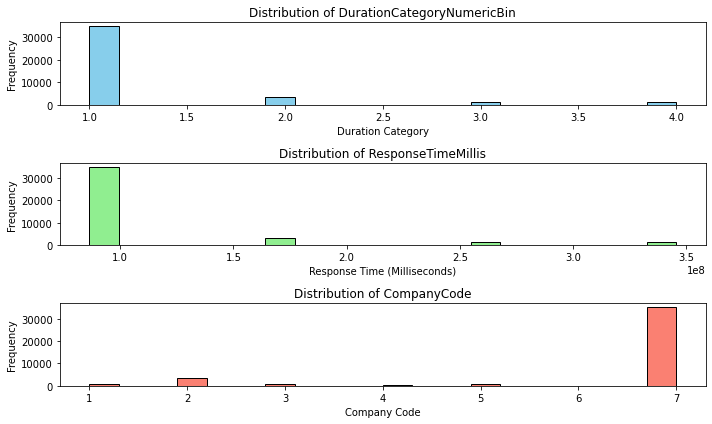

In [73]:
# Summary statistics for numerical variables
num_summary = df7[['DurationCategoryNumericBin', 'ResponseTimeMillis', 'CompanyCode']].describe()
print(num_summary)

# Histograms for numerical variables
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.hist(df7['DurationCategoryNumericBin'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of DurationCategoryNumericBin')
plt.xlabel('Duration Category')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(df7['ResponseTimeMillis'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of ResponseTimeMillis')
plt.xlabel('Response Time (Milliseconds)')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(df7['CompanyCode'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of CompanyCode')
plt.xlabel('Company Code')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [74]:
# Summary statistics for categorical variables
cat_summary = df7[['ProductBin', 'Subproduct', 'Issue', 'SubmittedVia', 'CompanyResponseToConsumer', 
                   'TimelyBin', 'IncomeCategoryBin', 'inequality_category']].describe(include='object')
print(cat_summary)

# Frequency tables for categorical variables
for col in ['ProductBin', 'Subproduct', 'Issue', 'SubmittedVia', 'CompanyResponseToConsumer', 
            'TimelyBin', 'IncomeCategoryBin', 'inequality_category']:
    print("\nFrequency table for", col)
    print(df7[col].value_counts())


              ProductBin        Subproduct  \
count              41180             41180   
unique                 5                74   
top     Credit Reporting  Credit reporting   
freq               24708             24489   

                                       Issue SubmittedVia  \
count                                  41180        41180   
unique                                   117            7   
top     Incorrect information on your report          Web   
freq                                   11883        36204   

       CompanyResponseToConsumer inequality_category  
count                      41180               41180  
unique                         8                   3  
top      Closed with explanation     High Inequality  
freq                       29806               35537  

Frequency table for ProductBin
Credit Reporting            24708
Debt Collection              5293
Other Financial Products     5156
Mortgage                     3988
Credit Card/Prepaid 

In [78]:
# Define a dictionary mapping each unique category to its corresponding code
product_bin_mapping = {
    'Other Financial Products': 1,
    'Credit Reporting': 2,
    'Debt Collection': 3,
    'Mortgage': 4,
    'Credit Card/Prepaid Card': 5
}

# Use a lambda function to map the categories to their codes
df7['ProductCode'] = df7['ProductBin'].apply(lambda x: product_bin_mapping.get(x))

# Display the DataFrame to verify the changes
print(df7[['ProductBin', 'ProductCode']])


                     ProductBin  ProductCode
0      Other Financial Products            1
1              Credit Reporting            2
2               Debt Collection            3
3              Credit Reporting            2
4                      Mortgage            4
...                         ...          ...
41175          Credit Reporting            2
41176          Credit Reporting            2
41177          Credit Reporting            2
41178           Debt Collection            3
41179          Credit Reporting            2

[41180 rows x 2 columns]


In [79]:
# Define a dictionary mapping each unique category to its corresponding code
submitted_via_mapping = {
    'Phone': 1,
    'Web': 2,
    'Referral': 3,
    'Postal mail': 4,
    'Fax': 5,
    'Email': 6,
    'Web Referral': 7
}

# Use a lambda function to map the categories to their codes
df7['ViaCode'] = df7['SubmittedVia'].apply(lambda x: submitted_via_mapping.get(x))

# Display the DataFrame to verify the changes
print(df7[['SubmittedVia', 'ViaCode']])


      SubmittedVia  ViaCode
0            Phone        1
1              Web        2
2              Web        2
3              Web        2
4              Web        2
...            ...      ...
41175          Web        2
41176          Web        2
41177          Web        2
41178     Referral        3
41179          Web        2

[41180 rows x 2 columns]


In [80]:
# Define a dictionary mapping each unique category to its corresponding code
response_mapping = {
    'Closed with explanation': 1,
    'Closed with non-monetary relief': 2,
    'In progress': 3,
    'Closed with monetary relief': 4,
    'Untimely response': 5,
    'Closed': 6,
    'Closed with relief': 7,
    'Closed without relief': 8
}

# Use a lambda function to map the categories to their codes
df7['FinalResolutionCode'] = df7['CompanyResponseToConsumer'].apply(lambda x: response_mapping.get(x))

# Display the DataFrame to verify the changes
print(df7[['CompanyResponseToConsumer', 'FinalResolutionCode']])


             CompanyResponseToConsumer  FinalResolutionCode
0              Closed with explanation                    1
1              Closed with explanation                    1
2              Closed with explanation                    1
3              Closed with explanation                    1
4              Closed with explanation                    1
...                                ...                  ...
41175  Closed with non-monetary relief                    2
41176          Closed with explanation                    1
41177          Closed with explanation                    1
41178          Closed with explanation                    1
41179          Closed with explanation                    1

[41180 rows x 2 columns]


In [81]:
# Define a lambda function to encode FinalResolutionCode
df7['ComplaintClosureCode'] = df7['FinalResolutionCode'].apply(lambda x: 0 if x in [1, 2, 4, 6, 7, 8] else 1)
# 0 means closed, 1 means open
# Display the DataFrame to verify the changes
print(df7[['FinalResolutionCode', 'ComplaintClosureCode']])


       FinalResolutionCode  ComplaintClosureCode
0                        1                     0
1                        1                     0
2                        1                     0
3                        1                     0
4                        1                     0
...                    ...                   ...
41175                    2                     0
41176                    1                     0
41177                    1                     0
41178                    1                     0
41179                    1                     0

[41180 rows x 2 columns]


In [93]:
df7.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DateReceived                41180 non-null  datetime64[ns]
 1   DurationCategoryNumericBin  41180 non-null  int64         
 2   CompanyCode                 41180 non-null  int64         
 3   ProductBin                  41180 non-null  object        
 4   Subproduct                  41180 non-null  object        
 5   Issue                       41180 non-null  object        
 6   ZipCode                     41180 non-null  object        
 7   SubmittedVia                41180 non-null  object        
 8   CompanyResponseToConsumer   41180 non-null  object        
 9   TimelyBin                   41180 non-null  int64         
 10  IncomeCategoryBin           41180 non-null  int64         
 11  inequality_category         41180 non-null  object    

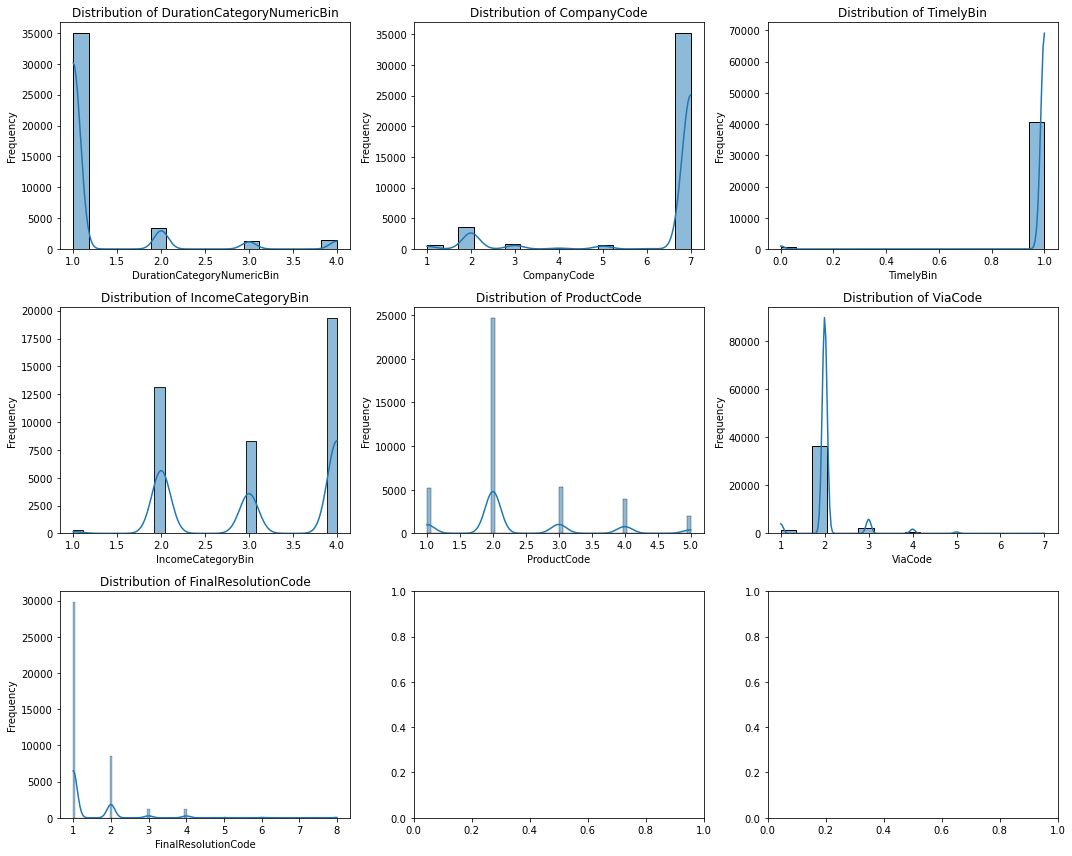

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for plotting
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of numerical columns
numerical_columns = ['DurationCategoryNumericBin', 'CompanyCode', 'TimelyBin', 'IncomeCategoryBin', 'ProductCode', 'ViaCode', 'FinalResolutionCode']

# Loop through each numerical column and create a plot
for i, column in enumerate(numerical_columns):
    sns.histplot(df7[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [88]:
df7.describe()


,DurationCategoryNumericBin,CompanyCode,TimelyBin,IncomeCategoryBin,ProductCode,ViaCode,FinalResolutionCode,ComplaintClosureCode
count,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000
mean,1.254274,6.343298,0.986474,3.134871,2.345265,2.073215,1.416367,0.032443
std,0.683408,1.651897,0.115513,0.897107,0.983200,0.472983,0.887474,0.177175
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,7.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000
50%,1.000000,7.000000,1.000000,3.000000,2.000000,2.000000,1.000000,0.000000
75%,1.000000,7.000000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000
max,4.000000,7.000000,1.000000,4.000000,5.000000,7.000000,8.000000,1.000000


In [85]:
df7.drop(columns=['ResponseTimeMillis'], inplace=True)


In [87]:
df7['ZipCode'] = df7['ZipCode'].astype(str)


## Relationships and Correlations

In [91]:
# Frequency table for ProductBin and Subproduct
product_subproduct_freq = df7.groupby(['ProductBin', 'Subproduct']).size().unstack(fill_value=0)
print(product_subproduct_freq)

# Frequency table for ProductBin and Issue
product_issue_freq = df7.groupby(['ProductBin', 'Issue']).size().unstack(fill_value=0)
print(product_issue_freq)

# Frequency table for SubmittedVia and CompanyResponseToConsumer
submittedvia_response_freq = df7.groupby(['SubmittedVia', 'CompanyResponseToConsumer']).size().unstack(fill_value=0)
print(submittedvia_response_freq)


Subproduct                (CD) Certificate of deposit  Auto  Auto debt  \
ProductBin                                                               
Credit Card/Prepaid Card                            0     0          0   
Credit Reporting                                    0     0          0   
Debt Collection                                     0    43        139   
Mortgage                                            0     0          0   
Other Financial Products                           30     0          0   

Subproduct                CD (Certificate of Deposit)  \
ProductBin                                              
Credit Card/Prepaid Card                            0   
Credit Reporting                                    0   
Debt Collection                                     0   
Mortgage                                            0   
Other Financial Products                           47   

Subproduct                Cashing a check without an account  Check cashing  \
Pr

C:\Users\emman\AppData\Local\Temp/ipykernel_15044/2952826167.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


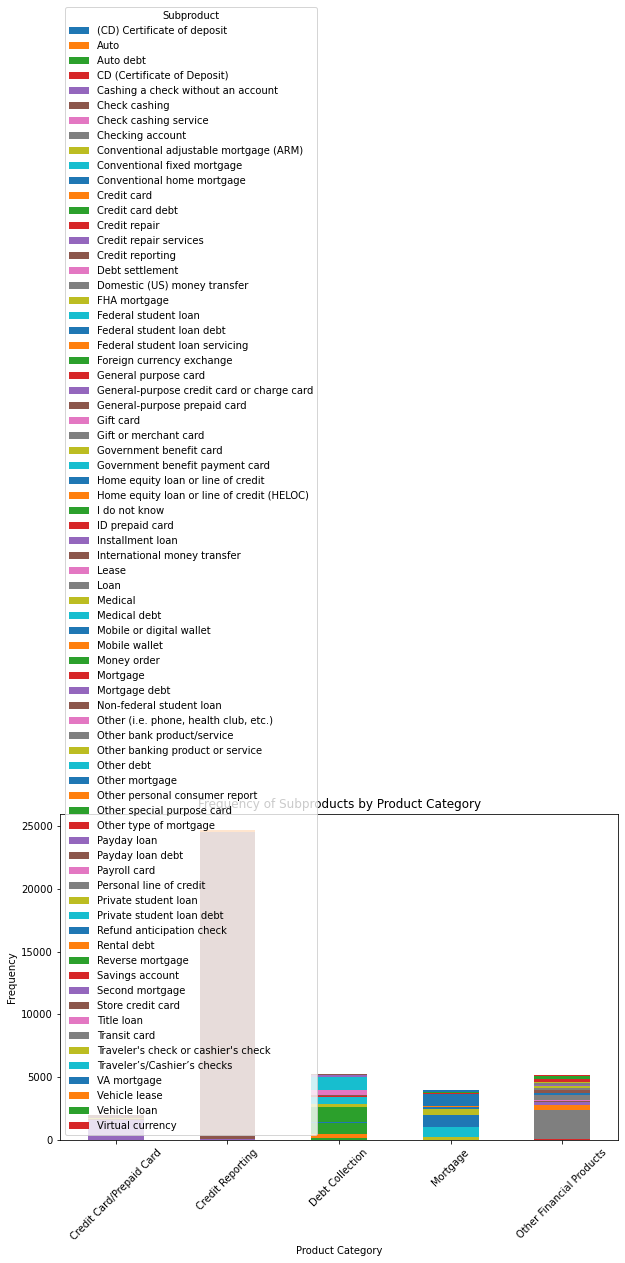

C:\Users\emman\AppData\Local\Temp/ipykernel_15044/2952826167.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


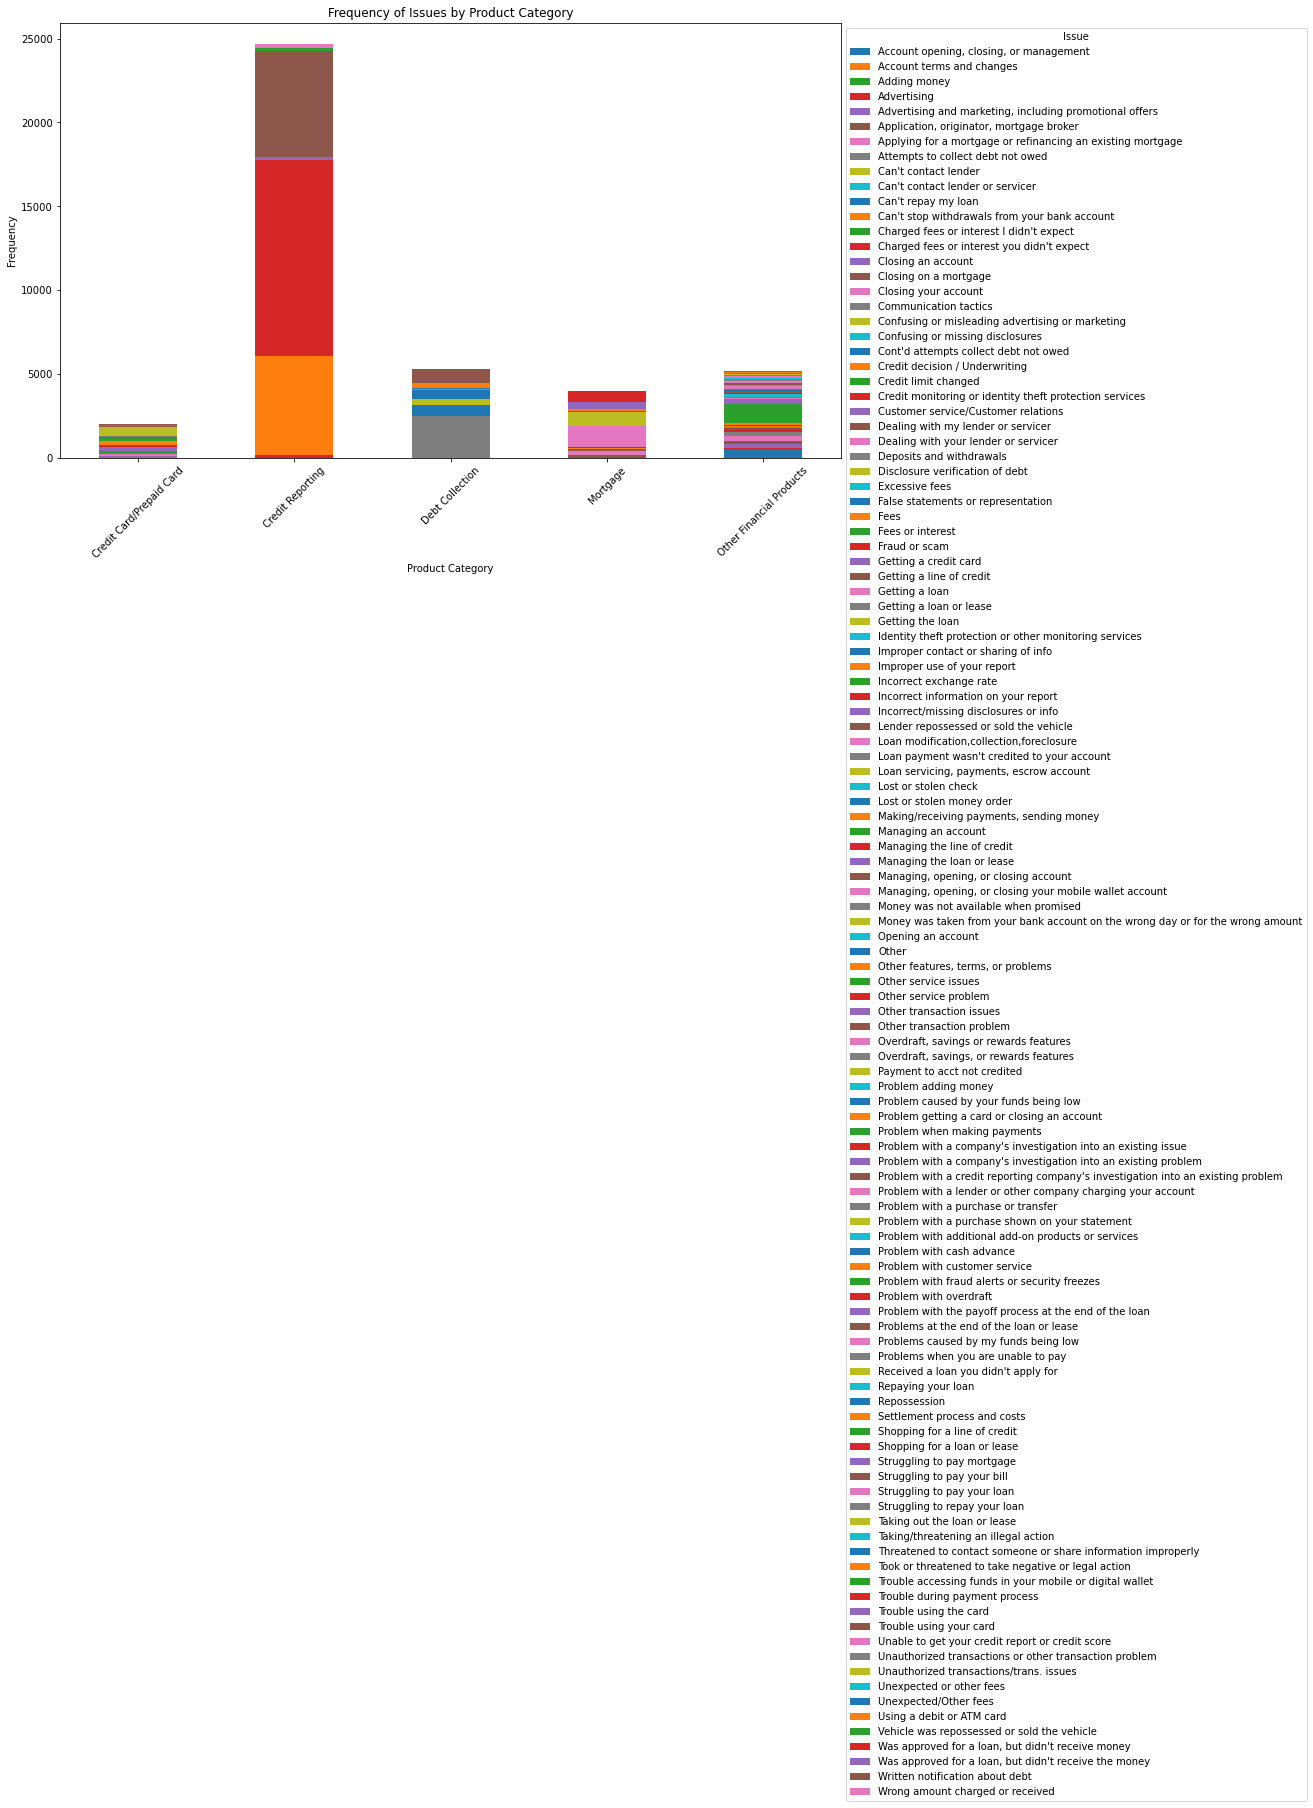

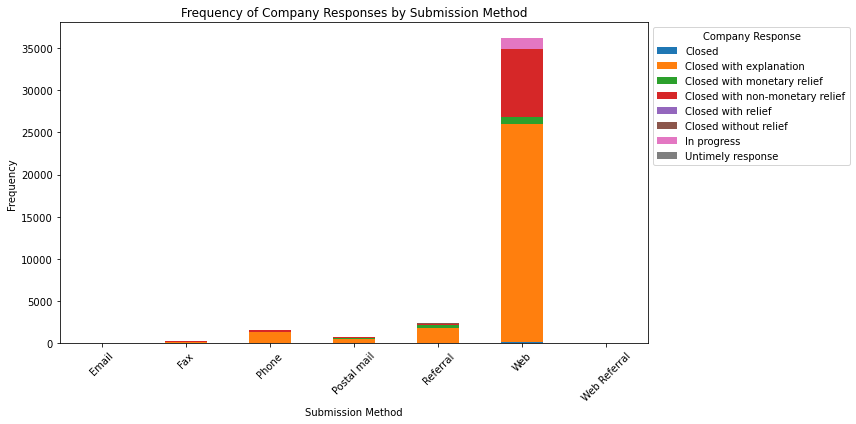

In [92]:
import matplotlib.pyplot as plt

# Plot for ProductBin and Subproduct
product_subproduct_freq.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Frequency of Subproducts by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.legend(title='Subproduct')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for ProductBin and Issue
product_issue_freq.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Frequency of Issues by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.legend(title='Issue', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for SubmittedVia and CompanyResponseToConsumer
submittedvia_response_freq.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Frequency of Company Responses by Submission Method')
plt.xlabel('Submission Method')
plt.ylabel('Frequency')
plt.legend(title='Company Response', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Temporal Analysis

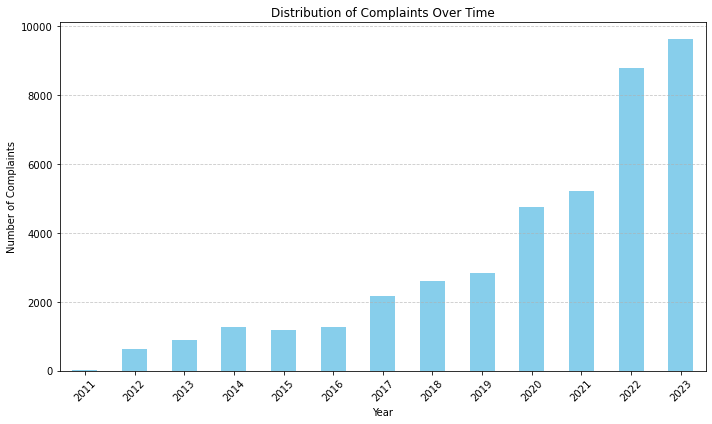


Yearly Summary of Complaints by Product Category:
ProductBin  Credit Card/Prepaid Card  Credit Reporting  Debt Collection  \
Year                                                                      
2011                               0                 0                0   
2012                               0                 0                0   
2013                               0                 0              120   
2014                               0                 0              456   
2015                               0                 0              407   
2016                               0                 0              427   
2017                             153               737              486   
2018                             245              1194              486   
2019                             234              1494              455   
2020                             334              3177              533   
2021                             296             

In [94]:
# Convert 'DateReceived' column to datetime type
#df7['DateReceived'] = pd.to_datetime(df7['DateReceived'])

# Extract year from 'DateReceived' column
df7['Year'] = df7['DateReceived'].dt.year

# Group by year and count the number of complaints
complaints_by_year = df7.groupby('Year').size()

# Plot the distribution of complaints over time
plt.figure(figsize=(10, 6))
complaints_by_year.plot(kind='bar', color='skyblue')
plt.title('Distribution of Complaints Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Summarize complaints by year
yearly_summary = df7.groupby(['Year', 'ProductBin']).size().unstack(fill_value=0)
print("\nYearly Summary of Complaints by Product Category:")
print(yearly_summary)


<Figure size 720x432 with 0 Axes>

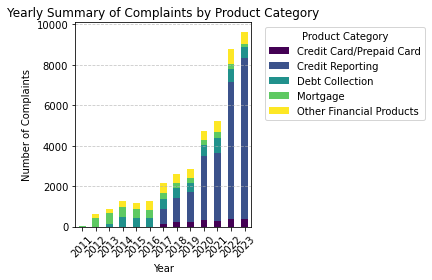

In [95]:
# Plot Yearly Summary of Complaints by Product Category
plt.figure(figsize=(10, 6))
yearly_summary.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Yearly Summary of Complaints by Product Category')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Feature Importance Analysis
Possible target variables. <br>
TimelyBin: This binary variable indicates whether the response to the consumer was provided timely (1) or not (0).
ComplaintClosureCode: This binary variable indicates whether the complaint was closed (1) or not (0).<br>
FinalResolutionCode: This variable could be treated as binary by encoding it according to the lambda function you mentioned earlier.<br>
ProductBin_Code: If you have encoded the "ProductBin" variable as you described earlier, you could use the encoded version as your target variable. This would imply trying to predict the product category associated with each complaint.<br>

In [98]:
# Save the DataFrame to a CSV file
df7.to_csv('claimts_EDA1.csv', index=False)



In [99]:
df8 = pd.read_csv('https://github.com/horacefonseca/datasets/raw/main/claimts_EDA1.csv')
df8.head(5)

,DateReceived,DurationCategoryNumericBin,CompanyCode,ProductBin,ProductCode,Issue,ZipCode,ViaCode,TimelyBin,IncomeCategoryBin,inequality_category,ComplaintClosureCode
0,11/10/2021,1,7,Other Financial Products,1,Managing an account,85719,1,1,2,High Inequality,0
1,4/1/2023,1,7,Credit Reporting,2,Incorrect information on your report,85719,2,1,2,High Inequality,0
2,9/17/2020,1,7,Debt Collection,3,Took or threatened to take negative or legal a...,85719,2,1,2,High Inequality,0
3,10/8/2022,1,7,Credit Reporting,2,Improper use of your report,85719,2,1,2,High Inequality,0
4,12/14/2022,1,7,Mortgage,4,Incorrect information on your report,85719,2,1,2,High Inequality,0


In [100]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   DateReceived                41180 non-null  object
 1   DurationCategoryNumericBin  41180 non-null  int64 
 2   CompanyCode                 41180 non-null  int64 
 3   ProductBin                  41180 non-null  object
 4   ProductCode                 41180 non-null  int64 
 5   Issue                       41180 non-null  object
 6   ZipCode                     41180 non-null  int64 
 7   ViaCode                     41180 non-null  int64 
 8   TimelyBin                   41180 non-null  int64 
 9   IncomeCategoryBin           41180 non-null  int64 
 10  inequality_category         41180 non-null  object
 11  ComplaintClosureCode        41180 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 3.8+ MB


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



# Define features (X) and target variable (y)
X = df8.drop(columns=['ComplaintClosureCode', 'DateReceived', 'Issue', 'ProductBin', 'inequality_category'])  # Excluding non-numeric and irrelevant columns
y = df8['ComplaintClosureCode']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7966
           1       0.00      0.00      0.00       270

    accuracy                           0.97      8236
   macro avg       0.48      0.50      0.49      8236
weighted avg       0.94      0.97      0.95      8236



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


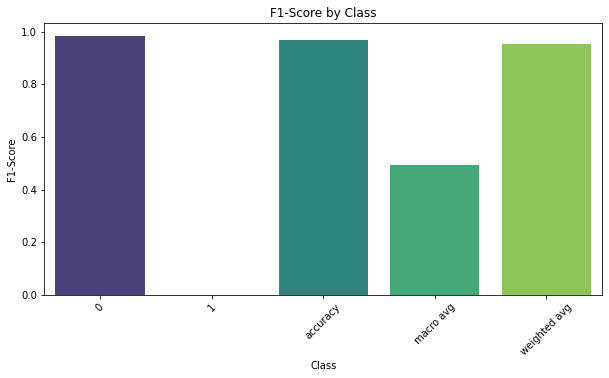

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are defined earlier in the code

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report dictionary to a DataFrame for easier manipulation
report_df = pd.DataFrame(report).transpose()

# Drop the support column
report_df.drop('support', axis=1, inplace=True)

# Plot the classification report
plt.figure(figsize=(10, 5))
sns.barplot(x=report_df.index, y=report_df['f1-score'], palette='viridis')
plt.title('F1-Score by Class')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.show()


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target variable (y) for ProductCode prediction
X = df8.drop(columns=['ProductCode', 'DateReceived', 'Issue', 'ProductBin', 'inequality_category'])  
y = df8['ProductCode']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.60
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1030
           2       0.62      1.00      0.76      4957
           3       0.07      0.01      0.02      1031
           4       0.00      0.00      0.00       809
           5       0.00      0.00      0.00       409

    accuracy                           0.60      8236
   macro avg       0.14      0.20      0.16      8236
weighted avg       0.38      0.60      0.46      8236



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


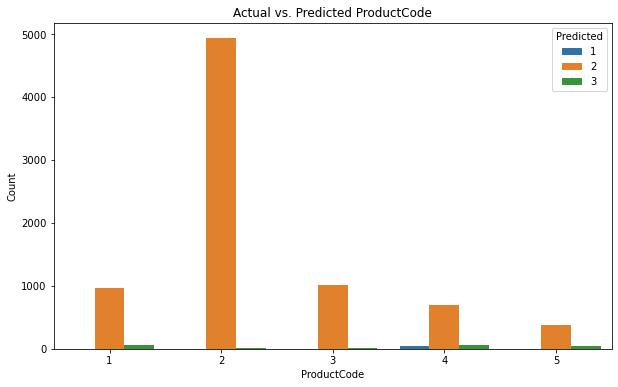

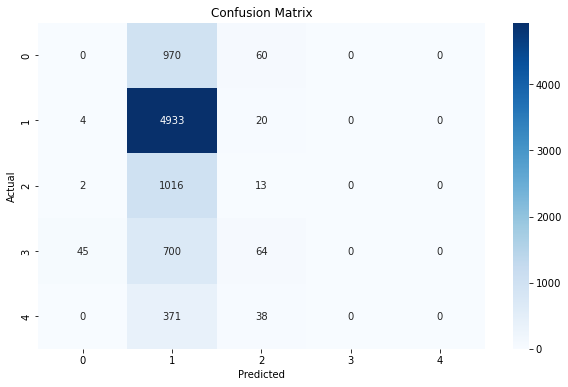

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot actual vs. predicted ProductCode values
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, hue=y_pred)
plt.title('Actual vs. Predicted ProductCode')
plt.xlabel('ProductCode')
plt.ylabel('Count')
plt.legend(title='Predicted', loc='upper right')
plt.show()

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
